# Lab | Customer Analysis

# Round 1

## Read the three files into python as dataframes

In [1]:
import pandas as pd
import numpy as np
file1 = pd.read_csv('/Users/joluhergo/Desktop/Ironhack/labs/lab-costumer-analysis-r1/file1.csv')
file2 = pd.read_csv('/Users/joluhergo/Desktop/Ironhack/labs/lab-costumer-analysis-r1/file2.csv')
file3 = pd.read_csv('/Users/joluhergo/Desktop/Ironhack/labs/lab-costumer-analysis-r1/file3.csv')

## Show the DataFrame's shape.

In [2]:
print("first data frame's shape: \n", file1.shape)
print("second data frame's shape: \n", file2.shape)
print("third data frame's shape: \n",file3.shape)


first data frame's shape: 
 (4008, 11)
second data frame's shape: 
 (996, 11)
third data frame's shape: 
 (7070, 11)


## Standardize header names.

Checking header names:

In [3]:
print("Headers of file 1: \n", file1.columns, "\n")
print("Headers of file 2: \n", file2.columns, "\n")
print("Headers of file 3: \n", file1.columns, "\n")

Headers of file 1: 
 Index(['Customer', 'ST', 'GENDER', 'Education', 'Customer Lifetime Value',
       'Income', 'Monthly Premium Auto', 'Number of Open Complaints',
       'Policy Type', 'Vehicle Class', 'Total Claim Amount'],
      dtype='object') 

Headers of file 2: 
 Index(['Customer', 'ST', 'GENDER', 'Education', 'Customer Lifetime Value',
       'Income', 'Monthly Premium Auto', 'Number of Open Complaints',
       'Total Claim Amount', 'Policy Type', 'Vehicle Class'],
      dtype='object') 

Headers of file 3: 
 Index(['Customer', 'ST', 'GENDER', 'Education', 'Customer Lifetime Value',
       'Income', 'Monthly Premium Auto', 'Number of Open Complaints',
       'Policy Type', 'Vehicle Class', 'Total Claim Amount'],
      dtype='object') 



Writing in capital letters:

In [4]:
file1.columns = list(map(lambda x: x.upper(), file1.columns))
file2.columns = list(map(lambda x: x.upper(), file2.columns))
file3.columns = list(map(lambda x: x.upper(), file3.columns))

## Rearrange the columns in the dataframe as needed

In [5]:
print("Headers of file 1: \n", file1.columns, "\n")
print("Headers of file 2: \n", file2.columns, "\n")
print("Headers of file 3: \n", file1.columns, "\n")

Headers of file 1: 
 Index(['CUSTOMER', 'ST', 'GENDER', 'EDUCATION', 'CUSTOMER LIFETIME VALUE',
       'INCOME', 'MONTHLY PREMIUM AUTO', 'NUMBER OF OPEN COMPLAINTS',
       'POLICY TYPE', 'VEHICLE CLASS', 'TOTAL CLAIM AMOUNT'],
      dtype='object') 

Headers of file 2: 
 Index(['CUSTOMER', 'ST', 'GENDER', 'EDUCATION', 'CUSTOMER LIFETIME VALUE',
       'INCOME', 'MONTHLY PREMIUM AUTO', 'NUMBER OF OPEN COMPLAINTS',
       'TOTAL CLAIM AMOUNT', 'POLICY TYPE', 'VEHICLE CLASS'],
      dtype='object') 

Headers of file 3: 
 Index(['CUSTOMER', 'ST', 'GENDER', 'EDUCATION', 'CUSTOMER LIFETIME VALUE',
       'INCOME', 'MONTHLY PREMIUM AUTO', 'NUMBER OF OPEN COMPLAINTS',
       'POLICY TYPE', 'VEHICLE CLASS', 'TOTAL CLAIM AMOUNT'],
      dtype='object') 



Arranging the headers of file 2 as the headers of file 01, and equalling the names

In [6]:
file2 = file2[['CUSTOMER', 'ST', 'GENDER', 'EDUCATION', 'CUSTOMER LIFETIME VALUE',
       'INCOME', 'MONTHLY PREMIUM AUTO', 'NUMBER OF OPEN COMPLAINTS',
       'POLICY TYPE', 'VEHICLE CLASS', 'TOTAL CLAIM AMOUNT']]

In [7]:
file3_copy=file3.rename(columns={'STATE': 'ST'})


In [8]:
file1.head(3)

,CUSTOMER,ST,GENDER,EDUCATION,CUSTOMER LIFETIME VALUE,INCOME,MONTHLY PREMIUM AUTO,NUMBER OF OPEN COMPLAINTS,POLICY TYPE,VEHICLE CLASS,TOTAL CLAIM AMOUNT
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247


In [9]:
file2.head(3)

,CUSTOMER,ST,GENDER,EDUCATION,CUSTOMER LIFETIME VALUE,INCOME,MONTHLY PREMIUM AUTO,NUMBER OF OPEN COMPLAINTS,POLICY TYPE,VEHICLE CLASS,TOTAL CLAIM AMOUNT
0,GS98873,Arizona,F,Bachelor,323912.47%,16061,88,1/0/00,Personal Auto,Four-Door Car,633.6
1,CW49887,California,F,Master,462680.11%,79487,114,1/0/00,Special Auto,SUV,547.2
2,MY31220,California,F,College,899704.02%,54230,112,1/0/00,Personal Auto,Two-Door Car,537.6


In [10]:
file3_copy.head(3)

,CUSTOMER,ST,CUSTOMER LIFETIME VALUE,EDUCATION,GENDER,INCOME,MONTHLY PREMIUM AUTO,NUMBER OF OPEN COMPLAINTS,POLICY TYPE,TOTAL CLAIM AMOUNT,VEHICLE CLASS
0,SA25987,Washington,3479.137523,High School or Below,M,0,104,0,Personal Auto,499.200000,Two-Door Car
1,TB86706,Arizona,2502.637401,Master,M,0,66,0,Personal Auto,3.468912,Two-Door Car
2,ZL73902,Nevada,3265.156348,Bachelor,F,25820,82,0,Personal Auto,393.600000,Four-Door Car


## Concatenate the three dataframes

In [11]:
merged_file = pd.concat([file1, file2, file3_copy], axis=0)
merged_file.shape

(12074, 11)

## Which columns are numerical?:

Checking the data types with .dtypes

In [12]:
merged_file.dtypes

CUSTOMER                      object
ST                            object
GENDER                        object
EDUCATION                     object
CUSTOMER LIFETIME VALUE       object
INCOME                       float64
MONTHLY PREMIUM AUTO         float64
NUMBER OF OPEN COMPLAINTS     object
POLICY TYPE                   object
VEHICLE CLASS                 object
TOTAL CLAIM AMOUNT           float64
dtype: object

Let's take only the numerical columns. We have to consider that number of open complaints and customer lifetime value are numerical too.

In [13]:
merged_file.select_dtypes(include='float64')

,INCOME,MONTHLY PREMIUM AUTO,TOTAL CLAIM AMOUNT
0,0.0,1000.0,2.704934
1,0.0,94.0,1131.464935
2,48767.0,108.0,566.472247
3,0.0,106.0,529.881344
4,36357.0,68.0,17.269323
...,...,...,...
7065,71941.0,73.0,198.234764
7066,21604.0,79.0,379.200000
7067,0.0,85.0,790.784983
7068,21941.0,96.0,691.200000


## Which columns are categorical?

In [14]:
merged_file.select_dtypes(include='object')

,CUSTOMER,ST,GENDER,EDUCATION,CUSTOMER LIFETIME VALUE,NUMBER OF OPEN COMPLAINTS,POLICY TYPE,VEHICLE CLASS
0,RB50392,Washington,NaN,Master,NaN,1/0/00,Personal Auto,Four-Door Car
1,QZ44356,Arizona,F,Bachelor,697953.59%,1/0/00,Personal Auto,Four-Door Car
2,AI49188,Nevada,F,Bachelor,1288743.17%,1/0/00,Personal Auto,Two-Door Car
3,WW63253,California,M,Bachelor,764586.18%,1/0/00,Corporate Auto,SUV
4,GA49547,Washington,M,High School or Below,536307.65%,1/0/00,Personal Auto,Four-Door Car
...,...,...,...,...,...,...,...,...
7065,LA72316,California,M,Bachelor,23405.98798,0,Personal Auto,Four-Door Car
7066,PK87824,California,F,College,3096.511217,0,Corporate Auto,Four-Door Car
7067,TD14365,California,M,Bachelor,8163.890428,3,Corporate Auto,Four-Door Car
7068,UP19263,California,M,College,7524.442436,0,Personal Auto,Four-Door Car


## Understand the meaning of all columns

## Perform the data cleaning operations mentioned so far in class

## Delete the column education and the number of open complaints from the dataframe

In [15]:
merged_file_copy = merged_file

In [16]:
merged_file_copy = merged_file_copy.drop(['EDUCATION', 'NUMBER OF OPEN COMPLAINTS'], axis=1)


## Correct the values in the column customer lifetime value. They are given as a percent, so multiply them by 100 and change dtype to numerical type.

In [17]:
merged_file_copy['CUSTOMER LIFETIME VALUE'] =  pd.to_numeric(merged_file_copy['CUSTOMER LIFETIME VALUE'], errors='coerce')

In [18]:
merged_file_copy["CUSTOMER LIFETIME VALUE"] = 100 * merged_file_copy["CUSTOMER LIFETIME VALUE"]

In [19]:
merged_file_copy.head()

,CUSTOMER,ST,GENDER,CUSTOMER LIFETIME VALUE,INCOME,MONTHLY PREMIUM AUTO,POLICY TYPE,VEHICLE CLASS,TOTAL CLAIM AMOUNT
0,RB50392,Washington,NaN,NaN,0.0,1000.0,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,NaN,0.0,94.0,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,NaN,48767.0,108.0,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,NaN,0.0,106.0,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,NaN,36357.0,68.0,Personal Auto,Four-Door Car,17.269323


## Check for duplicate rows in the data and remove if any

In [20]:
merged_file_copy_2 = merged_file_copy.drop_duplicates()
merged_file_copy_2

,CUSTOMER,ST,GENDER,CUSTOMER LIFETIME VALUE,INCOME,MONTHLY PREMIUM AUTO,POLICY TYPE,VEHICLE CLASS,TOTAL CLAIM AMOUNT
0,RB50392,Washington,NaN,NaN,0.0,1000.0,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,NaN,0.0,94.0,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,NaN,48767.0,108.0,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,NaN,0.0,106.0,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,NaN,36357.0,68.0,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...
7065,LA72316,California,M,2.340599e+06,71941.0,73.0,Personal Auto,Four-Door Car,198.234764
7066,PK87824,California,F,3.096511e+05,21604.0,79.0,Corporate Auto,Four-Door Car,379.200000
7067,TD14365,California,M,8.163890e+05,0.0,85.0,Corporate Auto,Four-Door Car,790.784983
7068,UP19263,California,M,7.524442e+05,21941.0,96.0,Personal Auto,Four-Door Car,691.200000


## Filter out the data for customers who have an income of 0 or less.

In [21]:
merged_file_copy_2[merged_file_copy_2['INCOME']=='0']

,CUSTOMER,ST,GENDER,CUSTOMER LIFETIME VALUE,INCOME,MONTHLY PREMIUM AUTO,POLICY TYPE,VEHICLE CLASS,TOTAL CLAIM AMOUNT


# Round 2

## Show the dataframe shape.

In [22]:
import pandas as pd
import numpy as np
marketing_data = pd.read_csv('/Users/joluhergo/Desktop/Ironhack/labs/lab-customer-analysis-r2/marketing_customer_analysis.csv')

In [23]:
print("Dataframe shape (rows,columns): \n",marketing_data.shape)

Dataframe shape (rows,columns): 
 (10910, 26)


## Standardize header names.

In [24]:
print("Columns: \n", marketing_data.columns)
marketing_data.columns = list(map(lambda x: x.upper(), marketing_data.columns))
print("Standarized columns: \n", marketing_data.columns)

Columns: 
 Index(['Unnamed: 0', 'Customer', 'State', 'Customer Lifetime Value',
       'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size',
       'Vehicle Type'],
      dtype='object')
Standarized columns: 
 Index(['UNNAMED: 0', 'CUSTOMER', 'STATE', 'CUSTOMER LIFETIME VALUE',
       'RESPONSE', 'COVERAGE', 'EDUCATION', 'EFFECTIVE TO DATE',
       'EMPLOYMENTSTATUS', 'GENDER', 'INCOME', 'LOCATION CODE',
       'MARITAL STATUS', 'MONTHLY PREMIUM AUTO', 'MONTHS SINCE LAST CLAIM',
       'MONTHS SINCE POLICY INCEPTION', 'NUMBER OF OPEN COMPLAINTS',
       'NUMBER OF POLICIES', 'POLICY TYPE', 'POLICY', 'RENEW OFFER TYPE',
       

## Which columns are numerical?

In [25]:
marketing_data.dtypes

UNNAMED: 0                         int64
CUSTOMER                          object
STATE                             object
CUSTOMER LIFETIME VALUE          float64
RESPONSE                          object
COVERAGE                          object
EDUCATION                         object
EFFECTIVE TO DATE                 object
EMPLOYMENTSTATUS                  object
GENDER                            object
INCOME                             int64
LOCATION CODE                     object
MARITAL STATUS                    object
MONTHLY PREMIUM AUTO               int64
MONTHS SINCE LAST CLAIM          float64
MONTHS SINCE POLICY INCEPTION      int64
NUMBER OF OPEN COMPLAINTS        float64
NUMBER OF POLICIES                 int64
POLICY TYPE                       object
POLICY                            object
RENEW OFFER TYPE                  object
SALES CHANNEL                     object
TOTAL CLAIM AMOUNT               float64
VEHICLE CLASS                     object
VEHICLE SIZE    

In [26]:
n = ['int64','float64']
marketing_data.select_dtypes(include=n).head()

,UNNAMED: 0,CUSTOMER LIFETIME VALUE,INCOME,MONTHLY PREMIUM AUTO,MONTHS SINCE LAST CLAIM,MONTHS SINCE POLICY INCEPTION,NUMBER OF OPEN COMPLAINTS,NUMBER OF POLICIES,TOTAL CLAIM AMOUNT
0,0,4809.216960,48029,61,7.0,52,0.0,9,292.800000
1,1,2228.525238,0,64,3.0,26,0.0,1,744.924331
2,2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
3,3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
4,4,9025.067525,23675,117,NaN,31,NaN,7,707.925645


## Which columns are categorical?

In [27]:
marketing_data.select_dtypes(include='object').head()

,CUSTOMER,STATE,RESPONSE,COVERAGE,EDUCATION,EFFECTIVE TO DATE,EMPLOYMENTSTATUS,GENDER,LOCATION CODE,MARITAL STATUS,POLICY TYPE,POLICY,RENEW OFFER TYPE,SALES CHANNEL,VEHICLE CLASS,VEHICLE SIZE,VEHICLE TYPE
0,DK49336,Arizona,No,Basic,College,2/18/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,NaN
1,KX64629,California,No,Basic,College,1/18/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,1/17/11,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,NaN


## Check and deal with NaN values

In [28]:
marketing_data.isna()

,UNNAMED: 0,CUSTOMER,STATE,CUSTOMER LIFETIME VALUE,RESPONSE,COVERAGE,EDUCATION,EFFECTIVE TO DATE,EMPLOYMENTSTATUS,GENDER,...,NUMBER OF OPEN COMPLAINTS,NUMBER OF POLICIES,POLICY TYPE,POLICY,RENEW OFFER TYPE,SALES CHANNEL,TOTAL CLAIM AMOUNT,VEHICLE CLASS,VEHICLE SIZE,VEHICLE TYPE
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
10906,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10907,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10908,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [29]:
marketing_data.isna().sum()

UNNAMED: 0                          0
CUSTOMER                            0
STATE                             631
CUSTOMER LIFETIME VALUE             0
RESPONSE                          631
COVERAGE                            0
EDUCATION                           0
EFFECTIVE TO DATE                   0
EMPLOYMENTSTATUS                    0
GENDER                              0
INCOME                              0
LOCATION CODE                       0
MARITAL STATUS                      0
MONTHLY PREMIUM AUTO                0
MONTHS SINCE LAST CLAIM           633
MONTHS SINCE POLICY INCEPTION       0
NUMBER OF OPEN COMPLAINTS         633
NUMBER OF POLICIES                  0
POLICY TYPE                         0
POLICY                              0
RENEW OFFER TYPE                    0
SALES CHANNEL                       0
TOTAL CLAIM AMOUNT                  0
VEHICLE CLASS                     622
VEHICLE SIZE                      622
VEHICLE TYPE                     5482
dtype: int64

checking how NaN values seem to be distributed

In [30]:
marketing_data[marketing_data['STATE'].isna()==True].head(60)

,UNNAMED: 0,CUSTOMER,STATE,CUSTOMER LIFETIME VALUE,RESPONSE,COVERAGE,EDUCATION,EFFECTIVE TO DATE,EMPLOYMENTSTATUS,GENDER,...,NUMBER OF OPEN COMPLAINTS,NUMBER OF POLICIES,POLICY TYPE,POLICY,RENEW OFFER TYPE,SALES CHANNEL,TOTAL CLAIM AMOUNT,VEHICLE CLASS,VEHICLE SIZE,VEHICLE TYPE
5,5,HO81102,NaN,4745.181764,NaN,Basic,High School or Below,2/14/11,Employed,M,...,0.0,7,Personal Auto,Personal L3,Offer1,Agent,292.800000,Four-Door Car,Medsize,A
11,11,GE63585,NaN,2420.711888,NaN,Basic,Bachelor,2/7/11,Employed,M,...,0.0,1,Corporate Auto,Corporate L3,Offer1,Call Center,199.551735,Two-Door Car,Medsize,NaN
58,58,BR69566,NaN,14019.833140,NaN,Basic,College,2/18/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer4,Call Center,469.882367,Two-Door Car,Small,NaN
62,62,UF44021,NaN,2108.493744,NaN,Basic,Bachelor,1/2/11,Unemployed,M,...,0.0,1,Personal Auto,Personal L2,Offer1,Agent,351.856810,Two-Door Car,Medsize,NaN
126,126,TE60343,NaN,4716.264294,NaN,Basic,High School or Below,2/25/11,Employed,M,...,1.0,3,Corporate Auto,Corporate L3,Offer2,Agent,292.800000,Four-Door Car,Medsize,A
131,131,QK24293,NaN,6265.343299,NaN,Extended,Doctor,1/13/11,Unemployed,F,...,1.0,4,Corporate Auto,Corporate L1,Offer1,Agent,481.025786,Four-Door Car,Medsize,NaN
155,155,JG35886,NaN,4111.888285,NaN,Premium,College,1/21/11,Employed,F,...,0.0,1,Personal Auto,Personal L2,Offer2,Call Center,480.073548,Four-Door Car,Medsize,A
168,168,FV22585,NaN,6960.920371,NaN,Extended,College,2/4/11,Employed,M,...,0.0,3,Personal Auto,Personal L1,Offer1,Call Center,16.711329,Four-Door Car,Medsize,NaN
169,169,AU23837,NaN,5010.379310,NaN,Basic,Bachelor,1/19/11,Employed,F,...,NaN,7,Corporate Auto,Corporate L3,Offer1,Agent,295.871784,Four-Door Car,Large,A
190,190,VZ18907,NaN,21991.615980,NaN,Basic,College,1/12/11,Employed,F,...,0.0,2,Personal Auto,Personal L3,Offer2,Branch,132.139111,SUV,Large,NaN


We cant drop the rows with NaN values because they also have importante information.
They are not a lot of NaN values, so we can check if we can fill some of them


In [31]:
marketing_data['STATE'].value_counts()


California    3552
Oregon        2909
Arizona       1937
Nevada         993
Washington     888
Name: STATE, dtype: int64

In [32]:
marketing_data['RESPONSE'].value_counts()

No     8813
Yes    1466
Name: RESPONSE, dtype: int64

In [33]:
marketing_data['NUMBER OF OPEN COMPLAINTS'].value_counts()

0.0    8160
1.0    1145
2.0     414
3.0     324
4.0     166
5.0      68
Name: NUMBER OF OPEN COMPLAINTS, dtype: int64

In [34]:
marketing_data['VEHICLE CLASS'].value_counts()

Four-Door Car    5212
Two-Door Car     2118
SUV              2012
Sports Car        550
Luxury SUV        208
Luxury Car        188
Name: VEHICLE CLASS, dtype: int64

In [35]:
marketing_data['VEHICLE SIZE'].value_counts()

Medsize    7251
Small      1966
Large      1071
Name: VEHICLE SIZE, dtype: int64

In [36]:
marketing_data['VEHICLE TYPE'].value_counts()

A    5428
Name: VEHICLE TYPE, dtype: int64

We could fill some of the NaN values with the average or the most frequent element of a column, but I think it is a better option to fill it more randomly using the data from the previous row, as otherwise it would increase too much some of the values

In [37]:
marketing_data_filled = marketing_data.fillna(method='backfill')

In [38]:
marketing_data_filled.isna().sum()

UNNAMED: 0                       0
CUSTOMER                         0
STATE                            1
CUSTOMER LIFETIME VALUE          0
RESPONSE                         1
COVERAGE                         0
EDUCATION                        0
EFFECTIVE TO DATE                0
EMPLOYMENTSTATUS                 0
GENDER                           0
INCOME                           0
LOCATION CODE                    0
MARITAL STATUS                   0
MONTHLY PREMIUM AUTO             0
MONTHS SINCE LAST CLAIM          0
MONTHS SINCE POLICY INCEPTION    0
NUMBER OF OPEN COMPLAINTS        0
NUMBER OF POLICIES               0
POLICY TYPE                      0
POLICY                           0
RENEW OFFER TYPE                 0
SALES CHANNEL                    0
TOTAL CLAIM AMOUNT               0
VEHICLE CLASS                    0
VEHICLE SIZE                     0
VEHICLE TYPE                     1
dtype: int64

We can check, taking 'STATE' as example, that this method doesnt change our values as mach as filling the most frequent (California would have increased in 631, wich is an increase of 17,7%)

In [39]:
marketing_data['STATE'].value_counts()

California    3552
Oregon        2909
Arizona       1937
Nevada         993
Washington     888
Name: STATE, dtype: int64

In [40]:
marketing_data_filled['STATE'].value_counts()

California    3765
Oregon        3085
Arizona       2067
Nevada        1051
Washington     941
Name: STATE, dtype: int64

Datetime format - Extract the months from the dataset and store in a separate column. 

In [41]:
marketing_data_filled['EFFECTIVE TO DATE'] = pd.to_datetime(marketing_data_filled['EFFECTIVE TO DATE'], errors='coerce')
marketing_data_filled['MONTH'] = marketing_data_filled['EFFECTIVE TO DATE'].dt.month

In [42]:
marketing_data_filled["EFFECTIVE TO DATE"]

0       2011-02-18
1       2011-01-18
2       2011-02-10
3       2011-01-11
4       2011-01-17
           ...    
10905   2011-01-19
10906   2011-01-06
10907   2011-02-06
10908   2011-02-13
10909   2011-01-08
Name: EFFECTIVE TO DATE, Length: 10910, dtype: datetime64[ns]

Filter the data to show only the information for the first quarter , ie. January, February and March. Hint: If data from March does not exist, consider only January and February.

# Round 3

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
marketing_data = pd.read_excel('/Users/joluhergo/Desktop/Ironhack/labs/lab-customer-r3/marketing_customer_analysis.xlsx')

## Show DataFrame info

Shape:

In [44]:
display(marketing_data.head(5))
print("Shape: ",marketing_data.shape)
print("Columns: ", marketing_data.columns)


,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


Shape:  (9134, 24)
Columns:  Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')


## Describe DataFrame

Data type:

In [45]:
marketing_data.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

First, let's see the categorical data:

In [46]:
marketing_data.select_dtypes(include='object').head(3)

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize


Let's describe the categorical data:

In [47]:
marketing_data.describe(include='object').T

,count,unique,top,freq
Customer,9134,9134,GW89148,1
State,9134,5,California,3150
Response,9134,2,No,7826
Coverage,9134,3,Basic,5568
Education,9134,5,Bachelor,2748
Effective To Date,9134,59,1/10/11,195
EmploymentStatus,9134,5,Employed,5698
Gender,9134,2,F,4658
Location Code,9134,3,Suburban,5779
Marital Status,9134,3,Married,5298


Now, the description of the numerical data:
The next table shows, for each column: mean, standard deviation, minimun value, Q1, median, Q3 and maximun value.

In [48]:
sumary = marketing_data.describe().T
sumary


,count,mean,std,min,25%,50%,75%,max
Customer Lifetime Value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
Income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
Monthly Premium Auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000
Months Since Last Claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000
Months Since Policy Inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000
Number of Open Complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000
Number of Policies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000
Total Claim Amount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678


We can also see the correlation for each pair of values:

In [49]:
correlations_matrix = marketing_data.corr()
correlations_matrix

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Customer Lifetime Value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
Income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
Monthly Premium Auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
Months Since Last Claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
Months Since Policy Inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
Number of Open Complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
Number of Policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
Total Claim Amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


And now, show this correlation in a heatmap

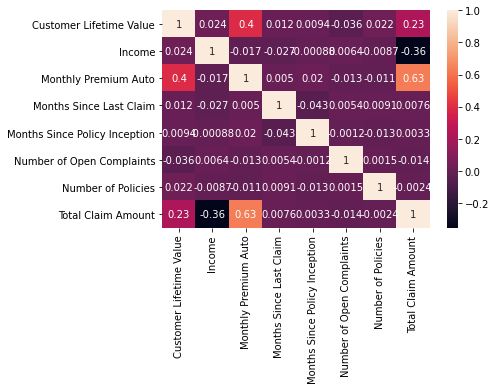

In [50]:
sns.heatmap(correlations_matrix, annot=True)
plt.show()

## Show a plot of the total number of responses.

No     7826
Yes    1308
Name: Response, dtype: int64


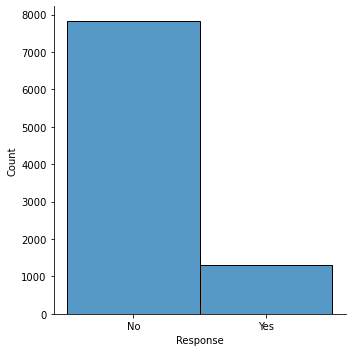

In [129]:
print(marketing_data["Response"].value_counts())
response_data = marketing_data["Response"]
sns.displot(response_data)
plt.show()

## Show a plot of the response rate by the sales channel

In [54]:
sales_channel_data = marketing_data["Sales Channel"]
sales_channel_data

0             Agent
1             Agent
2             Agent
3       Call Center
4             Agent
           ...     
9129            Web
9130         Branch
9131         Branch
9132         Branch
9133    Call Center
Name: Sales Channel, Length: 9134, dtype: object

In [55]:
sales_channel_data.unique()

array(['Agent', 'Call Center', 'Web', 'Branch'], dtype=object)

In [56]:
#Note: Another way that I know its not the best but it was the first I thought
a = 0
c = 0
w = 0
b = 0
n = 0
i= 0
while i < len(marketing_data):
    if (marketing_data["Response"][i] == "Yes") & (marketing_data["Sales Channel"][i] == "Agent"):
        a = a + 1
    elif (marketing_data["Response"][i] == "Yes") & (marketing_data["Sales Channel"][i] == "Call Center"):
        c = c + 1
    elif (marketing_data["Response"][i] == "Yes") & (marketing_data["Sales Channel"][i] == "Web"):
        w = w + 1
    elif (marketing_data["Response"][i] == "Yes") & (marketing_data["Sales Channel"][i] == "Branch"):
        b = b +1
    elif (marketing_data["Response"][i] == "No"):
        n = n +1
    i= i+1
response_by_sales = {"Agent": a, "Call Center": c,"Web":w,"Branch": b}
response_by_sales


{'Agent': 666, 'Call Center': 192, 'Web': 156, 'Branch': 294}

In [57]:
#checking the results are right
marketing_data["Response"].value_counts()

No     7826
Yes    1308
Name: Response, dtype: int64

Text(0, 0.5, 'Response')

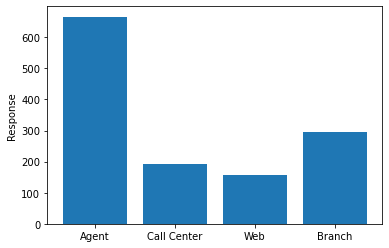

In [58]:
keys_response_by_sales = response_by_sales.keys()
val_response_by_sales = response_by_sales.values()

plt.bar(keys_response_by_sales, val_response_by_sales)
plt.ylabel('Response')

## Show a plot of the response rate by the total claim amount.

In [59]:
response_by_claim = marketing_data[["Response","Total Claim Amount"]]
response_by_claim

,Response,Total Claim Amount
0,No,384.811147
1,No,1131.464935
2,No,566.472247
3,No,529.881344
4,No,138.130879
...,...,...
9129,No,198.234764
9130,Yes,379.200000
9131,No,790.784983
9132,No,691.200000


In [60]:
response_by_claim['boolean_value'] = response_by_claim['Response'] == "Yes"
response_by_claim

<ipython-input-60-0e484395505b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  response_by_claim['boolean_value'] = response_by_claim['Response'] == "Yes"


,Response,Total Claim Amount,boolean_value
0,No,384.811147,False
1,No,1131.464935,False
2,No,566.472247,False
3,No,529.881344,False
4,No,138.130879,False
...,...,...,...
9129,No,198.234764,False
9130,Yes,379.200000,True
9131,No,790.784983,False
9132,No,691.200000,False


The next box plot shows a lot of information. We can see where are the 50% of the values wich are between the 25% and 75% of the analysed data

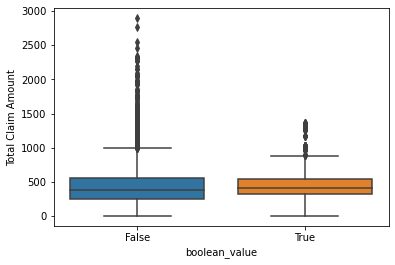

In [61]:
sns.boxplot(x="boolean_value", y="Total Claim Amount", data=response_by_claim)
plt.show()

The following gives us less information and its less clear,  0  on x axis corresponds with the response "No" and ones on x axis corresponds with response "Yes"

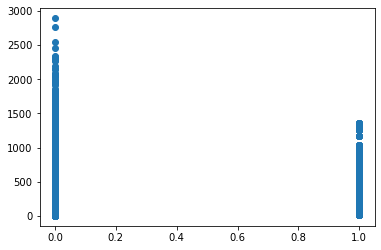

In [62]:
plt.scatter(x=response_by_claim['boolean_value'], y=response_by_claim['Total Claim Amount'])
plt.show()


## Show a plot of the response rate by income

In [63]:
response_by_income = marketing_data[["Response","Income"]]
response_by_income['boolean_value'] = response_by_claim['Response'] == "Yes"

<ipython-input-63-1cd9a7586296>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  response_by_income['boolean_value'] = response_by_claim['Response'] == "Yes"


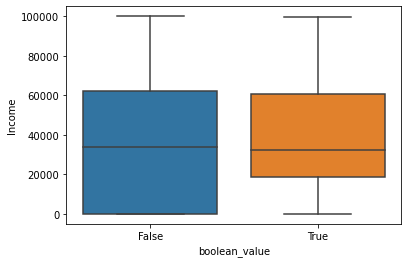

In [64]:
sns.boxplot(x="boolean_value", y="Income", data=response_by_income)
plt.show()
#we can see that most of the people who answered are around the value of 30000

# Round 4

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
marketing_data = pd.read_excel('/Users/joluhergo/Desktop/Ironhack/labs/lab_customer_analysis_r4/marketing_customer_analysis.xlsx')

## Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals.
(You can use np.number and np.object to select the numerical data types and categorical data types respectively)

In [66]:
marketing_data.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [132]:
num_marketing_data = marketing_data.select_dtypes(include='number')
num_marketing_data.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [130]:
marketing_data.select_dtypes(include='object').head()

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


## Now we will try to check the normality of the numerical variables visually

### Use seaborn library to construct distribution plots for the numerical variables

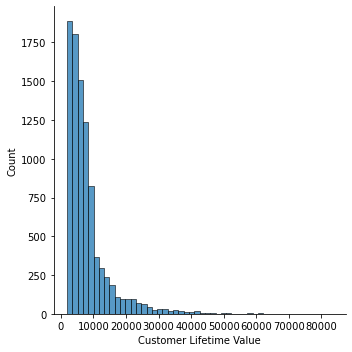

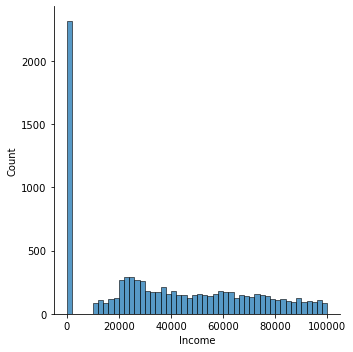

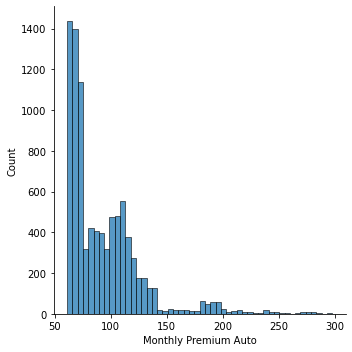

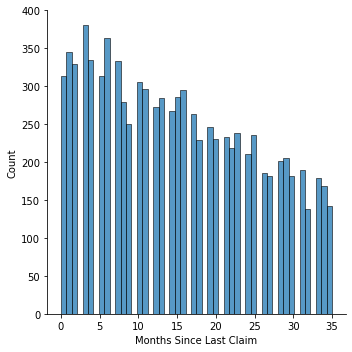

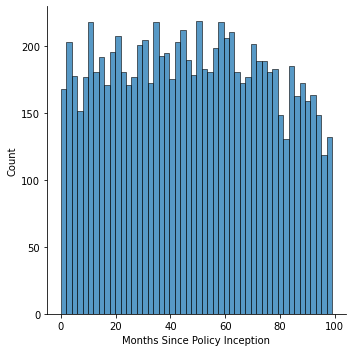

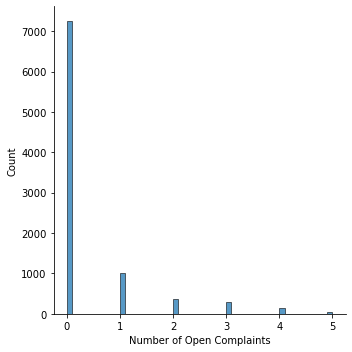

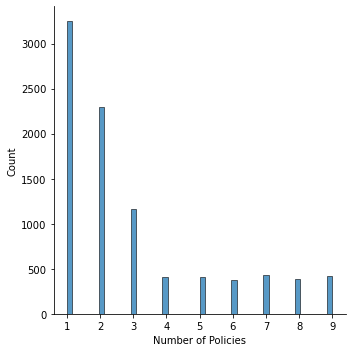

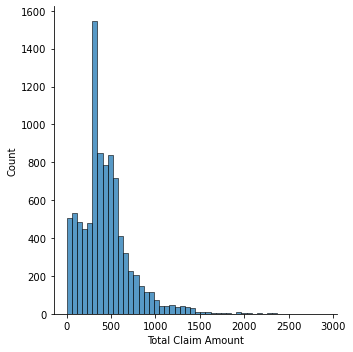

In [69]:
for i in num_marketing_data.columns:
    sns.displot(data= num_marketing_data[i],bins= 50)

Lets check the ones that look more normal

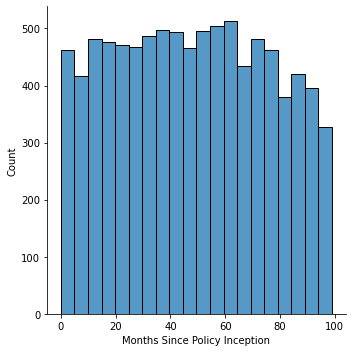

In [70]:
sns.displot(num_marketing_data, x="Months Since Policy Inception",bins=20)

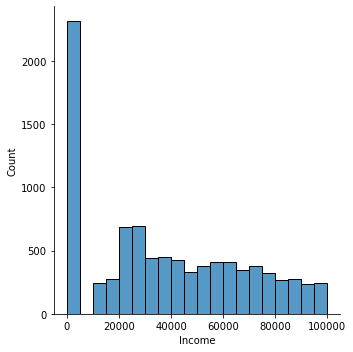

In [71]:
sns.displot(num_marketing_data, x="Income",bins=20)

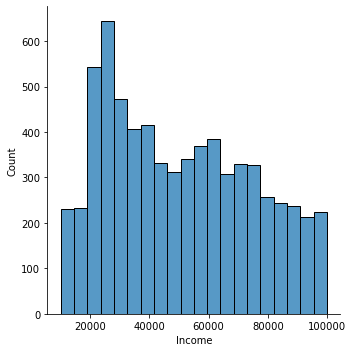

In [72]:
sns.displot(data= num_marketing_data["Income"][num_marketing_data["Income"]>0], bins=20)


### Use Matplotlib to construct histograms

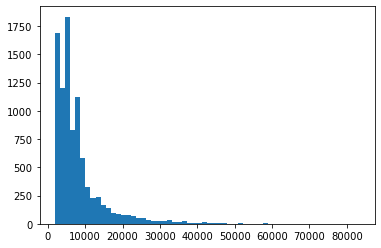

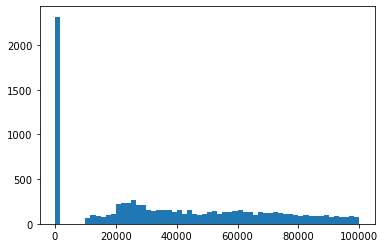

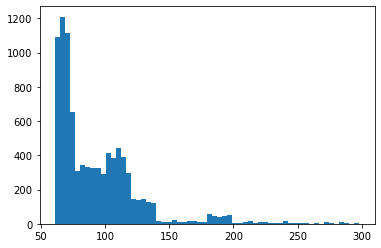

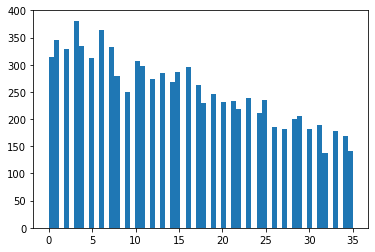

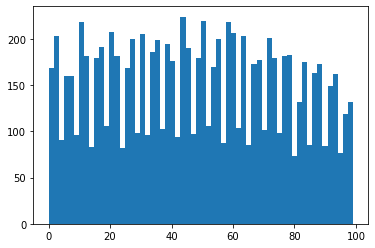

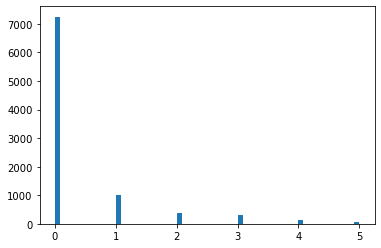

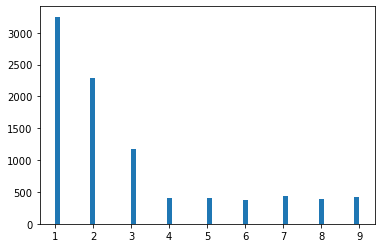

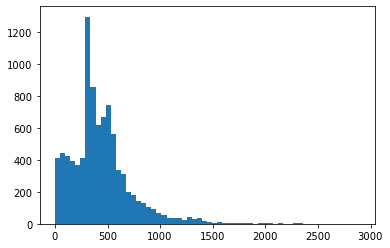

In [73]:
for i in num_marketing_data.columns:
    plt.hist(x=i, data=num_marketing_data, bins= 60)
    plt.show()

if we drop 0 values, it seems more like a normal distribution


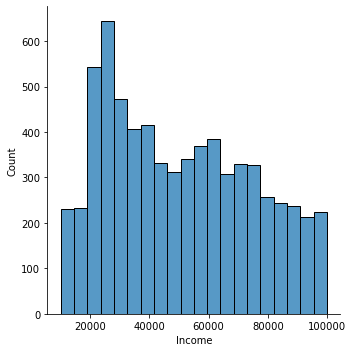

In [133]:
sns.displot(data= num_marketing_data["Income"][num_marketing_data["Income"]>0], bins=20)

## For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.

## Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features

Checking the correlation:

In [74]:
correlation_matrix = num_marketing_data.corr()
correlation_matrix

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Customer Lifetime Value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
Income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
Monthly Premium Auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
Months Since Last Claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
Months Since Policy Inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
Number of Open Complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
Number of Policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
Total Claim Amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


Showing the heatmap:
(we see that there is no multicolinearity between the features)

<AxesSubplot:>

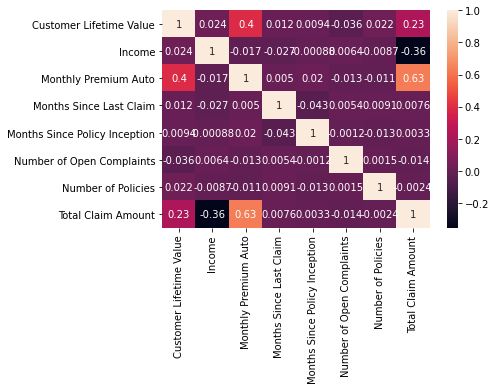

In [75]:
sns.heatmap(correlation_matrix, annot=True)

# Round 5

## Split X and y

In [89]:
from sklearn.preprocessing import MinMaxScaler

y = num_marketing_data["Total Claim Amount"]
X = num_marketing_data.drop(columns = "Total Claim Amount", axis = 1)

#Show X
X

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies
0,2763.519279,56274,69,32,5,0,1
1,6979.535903,0,94,13,42,0,8
2,12887.431650,48767,108,18,38,0,2
3,7645.861827,0,106,18,65,0,7
4,2813.692575,43836,73,12,44,0,1
...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2
9130,3096.511217,21604,79,14,28,0,1
9131,8163.890428,0,85,9,37,3,2
9132,7524.442436,21941,96,34,3,0,3


Now we define MinMaxScaler and normalize the data

In [90]:
minmax = MinMaxScaler().fit(num_marketing_data)
list = minmax.transform(num_marketing_data)
normalized_data = pd.DataFrame(list, columns =num_marketing_data.columns)

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,0.010629,0.562847,0.033755,0.914286,0.050505,0.0,0.000,0.132974
1,0.062406,0.000000,0.139241,0.371429,0.424242,0.0,0.875,0.391051
2,0.134960,0.487763,0.198312,0.514286,0.383838,0.0,0.125,0.195764
3,0.070589,0.000000,0.189873,0.514286,0.656566,0.0,0.750,0.183117
4,0.011245,0.438443,0.050633,0.342857,0.444444,0.0,0.000,0.047710


show the normalize data:

In [ ]:
normalized_data.head()

# Round 6

## Proccessing Data

### One Hot/Label Encoding

#### Let's see the categorical data:

In [108]:
cat_marketing_data = marketing_data.select_dtypes(include='object')
cat_marketing_data.head(3)

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize


Let's check the values of each column. It could help to choose how to encode it

We cant work neither with "Customer" column nor with "Effective to Date" column because every value is unique and works as an identifier of each row, as we can see:


In [109]:
for col in cat_marketing_data.columns:
    print("Unique values in ", col, "are: \n",  cat_marketing_data[col].unique(), "\n")


Unique values in  Customer are: 
 ['BU79786' 'QZ44356' 'AI49188' ... 'TD14365' 'UP19263' 'Y167826'] 

Unique values in  State are: 
 ['Washington' 'Arizona' 'Nevada' 'California' 'Oregon'] 

Unique values in  Response are: 
 ['No' 'Yes'] 

Unique values in  Coverage are: 
 ['Basic' 'Extended' 'Premium'] 

Unique values in  Education are: 
 ['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor'] 

Unique values in  Effective To Date are: 
 ['2/24/11' '1/31/11' '2/19/11' '1/20/11' '2/3/11' '1/25/11' '1/18/11'
 '1/26/11' '2/17/11' '2/21/11' '1/6/11' '2/6/11' '1/10/11' '1/17/11'
 '1/5/11' '2/27/11' '1/14/11' '1/21/11' '2/5/11' '1/29/11' '2/28/11'
 '2/12/11' '2/2/11' '2/7/11' '1/22/11' '2/13/11' '1/15/11' '1/8/11'
 '1/11/11' '1/28/11' '2/8/11' '2/23/11' '1/2/11' '2/16/11' '1/27/11'
 '1/23/11' '1/9/11' '2/11/11' '2/4/11' '2/1/11' '2/15/11' '2/26/11'
 '1/16/11' '1/1/11' '2/10/11' '1/24/11' '2/25/11' '1/12/11' '2/9/11'
 '1/19/11' '1/4/11' '2/14/11' '2/20/11' '2/18/11' '1/3/11' '1/13/11

In [110]:
cat_marketing_data_filt = cat_marketing_data.drop(columns= ["Customer","Effective To Date"])

We can use Label Encoding for "Coverage" and "Vehicle Size" 
(I think it could be used, for example, if we assign one number from 1 to 3 to each vehicle size, and calculate the mean value, we can see quickly the average size). But it doesn't seem necessary so 

We can use One Hot Encoding for the rest of columns

Let's use One Hot Encode

Import:

In [111]:
from sklearn.preprocessing import OneHotEncoder

In [112]:
onehot_matrix = pd.DataFrame()

In [113]:
for col in cat_marketing_data_filt.columns:
    marketing_encoder = OneHotEncoder().fit(cat_marketing_data_filt[[col]])
    marketing_encoded = marketing_encoder.transform(cat_marketing_data_filt[[col]]).toarray()

    onehot_encoded = pd.DataFrame(marketing_encoded, columns=marketing_encoder.categories_)
    onehot_matrix = pd.concat([onehot_matrix, onehot_encoded], axis = 1)

onehot_matrix.head()

,Arizona,California,Nevada,Oregon,Washington,No,Yes,Basic,Extended,Premium,...,Web,Four-Door Car,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car,Large,Medsize,Small
0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Concat DataFrames

Let's create a new DataFrame by concating the numerical data we had normalised before and our new encoded data and display it
 

In [114]:
num_norm_marketing_data = pd.concat([num_marketing_data, onehot_matrix], axis=1)
display(num_norm_marketing_data.head())

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,"(Arizona,)","(California,)",...,"(Web,)","(Four-Door Car,)","(Luxury Car,)","(Luxury SUV,)","(SUV,)","(Sports Car,)","(Two-Door Car,)","(Large,)","(Medsize,)","(Small,)"
0,2763.519279,56274,69,32,5,0,1,384.811147,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,6979.535903,0,94,13,42,0,8,1131.464935,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,12887.431650,48767,108,18,38,0,2,566.472247,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,7645.861827,0,106,18,65,0,7,529.881344,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,2813.692575,43836,73,12,44,0,1,138.130879,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Linear Regression

### Train-test split

In [115]:
from sklearn.model_selection import train_test_split

We did it before:
    [
    Split X and y:
    y = num_marketing_data["Total Claim Amount"]
    X = num_marketing_data.drop(columns = "Total Claim Amount", axis = 1)
    ]


Now we are going to do the same with the new processed data:

In [116]:
y = num_norm_marketing_data["Total Claim Amount"]
X = num_norm_marketing_data.drop(columns = "Total Claim Amount", axis = 1)

Now we are separating the recently splited data into two parts, train and test, so we can create the linear regression
model using X_train and y_train, and test it using X_test and y_test.

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Let's take a look on these data frames:

In [118]:
print("X_train's shape: \n", X_train.shape)
print("X_test's shape: \n",X_test.shape)
print("y_train's shape: \n",y_train.shape)
print("y_test's shape: \n",y_test.shape)
display(X_train.head(3))
y_train.head(3)

X_train's shape: 
 (7307, 64)
X_test's shape: 
 (1827, 64)
y_train's shape: 
 (7307,)
y_test's shape: 
 (1827,)


,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,"(Arizona,)","(California,)","(Nevada,)",...,"(Web,)","(Four-Door Car,)","(Luxury Car,)","(Luxury SUV,)","(SUV,)","(Sports Car,)","(Two-Door Car,)","(Large,)","(Medsize,)","(Small,)"
5123,4768.955924,51144,61,28,32,1,9,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
7738,2827.559570,0,79,30,25,0,1,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
214,2912.892035,81097,74,7,67,0,1,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


5123    223.305224
7738    568.800000
214     355.200000
Name: Total Claim Amount, dtype: float64

### Apply linear regresion

First, we have to import linear_model:

In [119]:
from sklearn import linear_model

Now, we define our linear model 

In [120]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)

In [121]:
from sklearn.metrics import r2_score
predictions_train = lm.predict(X_train)
r2_score(y_train, predictions_train)

0.7743063388482427

Now let's check the accuracy of predictions in our test portion of the data

## Model Validation

We can take a first look and see the predicted data (predictions_test) are quite similar to the real values (y_test):

In [122]:
predictions_test = lm.predict(X_test)
print("Predicted data for the test data: \n", predictions_test)
print("\n Known values (y_test): \n", y_test)

Predicted data for the test data: 
 [191.48275208 463.4150492  452.65239722 ... 199.97317467 522.48361056
 651.41017181]

 Known values (y_test): 
 708     218.598065
47      447.793440
3995    451.200000
1513    355.641958
3686    470.097411
           ...    
4855    665.931223
1880     33.970000
8472     43.155950
5967    453.600000
7971    852.460341
Name: Total Claim Amount, Length: 1827, dtype: float64


## Description:

### R2 (R-Squared error):
R-Squared shows, in a rate of 0 to 1, the percentage of the data that fit the regression model

In [123]:
print("R2 error: \n", r2_score(y_test, predictions_test))

R2 error: 
 0.7626525506280235


### MSE (Mean Sqaured Error):
MSE of an estimator measures the average of the squares of the errors, that is, the average squared difference between the estimated values and what is estimated (Wikipedia)

In [124]:
from sklearn.metrics import mean_squared_error

In [125]:
mse = mean_squared_error(y_test, predictions_test)
print("MSE: \n", mse)

MSE: 
 18871.742723325322


We can see it's a high number, it may indicate: 
either the variance or the bias in your estimator is large
or the model is not well specified
In this case, I think the problem might be that the data is not scaled (there is a high variance), so R-Squared tells more about the quality of the model.
Lets check how the variance is:

In [126]:
print("We can see the variance of the tested data: \n",
    y_test.var(), 
    "\n is high, so that could be the reason why MSE is a high number ")

We can see the variance of the tested data: 
 79554.58460248151 
 is high, so that could be the reason why MSE is a high number 


### RMSE: Root-Mean-Square-Error (RMSE) or Root-Mean-Squared-Deviation(RMSD):
The RMSE is a measure of the differences between values predicted by a model or an estimator and the values observed.
The standard deviation is the squared root of the variance, and the RMSD( or RMSE) is te squared root of MSE:

In [127]:
import math
rmse = math.sqrt(mse)
print("RMSE: \n", rmse)


RMSE: 
 137.3744616852977


### MAE: Mean Absolute Error

mean absolute error (MAE) is a measure of errors between paired observations expressing the same phenomenon

In [128]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predictions_test)
print("MAE: \n", mae)

MAE: 
 94.53517127125208


# Round 7

# Final Round <a name="id8"></a>

(I've put everything together and formatted it using markdown, I wasn't sure what else to do)